In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import keras
import pickle

2022-12-19 15:21:17.240931: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-19 15:21:17.455264: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-19 15:21:17.455309: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-19 15:21:18.537737: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
df_train = pd.read_csv('./data/train_final.csv')
df_train.drop(['education'], axis=1, inplace=True)
workclass_maxf = df_train['workclass'].value_counts().index[0]
occupation_maxf = df_train['occupation'].value_counts().index[0]
native_country_maxf = df_train['native.country'].value_counts().index[0]
df_train = df_train.replace('?', np.nan)
df_train['workclass'].fillna(workclass_maxf, inplace=True)
df_train['occupation'].fillna(occupation_maxf, inplace=True)
df_train['native.country'].fillna(native_country_maxf, inplace=True)
df_train

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,Self-emp-not-inc,93449,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
1,33,Self-emp-not-inc,123424,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,47,Private,144844,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,40,Private,114580,9,Divorced,Craft-repair,Other-relative,White,Female,0,0,40,Vietnam,0
4,39,Private,115618,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,Private,83451,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,0
24996,64,Local-gov,202738,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States,0
24997,39,Private,225544,14,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,Poland,0
24998,53,Private,346871,9,Divorced,Prof-specialty,Not-in-family,White,Male,4787,0,46,United-States,1


In [3]:
df_test = pd.read_csv('./data/test_final.csv')
df_test.drop(['ID', 'education'], axis=1, inplace=True)
df_test = df_test.replace('?', np.nan)
df_test['workclass'].fillna(workclass_maxf, inplace=True)
df_test['occupation'].fillna(occupation_maxf, inplace=True)
df_test['native.country'].fillna(native_country_maxf, inplace=True)
df_test

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,33,Self-emp-not-inc,222162,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
1,68,Private,29240,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,12,United-States
2,34,Private,103596,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States
3,57,Private,103403,3,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
4,48,Private,152915,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23837,26,Private,43408,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
23838,27,Private,116372,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
23839,67,Self-emp-inc,182581,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,20,United-States
23840,46,Local-gov,274689,12,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States


In [4]:
x_train, y_train = df_train.iloc[:, :-1], df_train.iloc[:, -1]
x_combn = x_train.append(df_test)
x_combn = pd.get_dummies(x_combn)
for col in ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']:
    x_combn[col] = x_combn[col]/x_combn[col].max()
x_train, x_test = x_combn.iloc[:len(y_train),:], x_combn.iloc[len(y_train):,:]

/tmp/ipykernel_703515/3948410678.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_combn = x_train.append(df_test)


In [5]:
x_train

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0.588889,0.062701,0.9375,0.00000,0.0,0.404040,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.082813,0.8125,0.00000,0.0,0.404040,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.522222,0.097185,0.5625,0.00000,0.0,0.404040,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.444444,0.076879,0.5625,0.00000,0.0,0.404040,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.433333,0.077575,0.5625,0.00000,0.0,0.505051,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.200000,0.055992,0.5625,0.00000,0.0,0.252525,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
24996,0.711111,0.136029,0.5625,0.00000,0.0,0.353535,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
24997,0.433333,0.151331,0.8750,0.00000,0.0,0.404040,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
24998,0.588889,0.232737,0.5625,0.04787,0.0,0.464646,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [6]:
x_test

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0.366667,0.149062,0.5625,0.000000,0.0,0.404040,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.755556,0.019619,0.5625,0.000000,0.0,0.121212,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.377778,0.069509,0.5625,0.000000,0.0,0.404040,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.633333,0.069379,0.1875,0.000000,0.0,0.404040,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.533333,0.102600,0.6250,0.000000,0.0,0.404040,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23837,0.288889,0.029125,0.8125,0.000000,0.0,0.404040,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
23838,0.300000,0.078081,0.8125,0.000000,0.0,0.404040,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
23839,0.744444,0.122505,0.6250,0.200512,0.0,0.202020,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23840,0.511111,0.184306,0.7500,0.000000,0.0,0.404040,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
x = x_train
y = y_train

In [8]:
model = Sequential()
model.add(Dense(x.columns.size*5, activation=keras.activations.relu, kernel_initializer=keras.initializers.glorot_uniform(), input_shape=(x.columns.size,)))
model.add(Dense(x.columns.size*5, activation=keras.activations.relu, kernel_initializer=keras.initializers.glorot_uniform()))
model.add(Dense(x.columns.size*5, activation=keras.activations.relu, kernel_initializer=keras.initializers.glorot_uniform()))
model.add(Dense(x.columns.size*5, activation=keras.activations.relu, kernel_initializer=keras.initializers.glorot_uniform()))
model.add(Dense(x.columns.size*5, activation=keras.activations.relu, kernel_initializer=keras.initializers.glorot_uniform()))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
model.fit(x, y, epochs=256, batch_size=64, verbose=1)

2022-12-19 15:21:20.131536: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 15:21:20.132053: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-19 15:21:20.132282: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-19 15:21:20.132420: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-19 15:21:20.132510: W tensorflow/c

Epoch 1/256
391/391 [==============================] - 6s 12ms/step - loss: 0.3932 - accuracy: 0.8144
Epoch 2/256
391/391 [==============================] - 5s 12ms/step - loss: 0.3406 - accuracy: 0.8408
Epoch 3/256
391/391 [==============================] - 5s 12ms/step - loss: 0.3329 - accuracy: 0.8430
Epoch 4/256
391/391 [==============================] - 4s 11ms/step - loss: 0.3223 - accuracy: 0.8473
Epoch 5/256
391/391 [==============================] - 4s 11ms/step - loss: 0.3166 - accuracy: 0.8529
Epoch 6/256
391/391 [==============================] - 4s 11ms/step - loss: 0.3129 - accuracy: 0.8546
Epoch 7/256
391/391 [==============================] - 4s 11ms/step - loss: 0.3097 - accuracy: 0.8567
Epoch 8/256
391/391 [==============================] - 4s 11ms/step - loss: 0.3041 - accuracy: 0.8583
Epoch 9/256
391/391 [==============================] - 4s 11ms/step - loss: 0.3004 - accuracy: 0.8600
Epoch 10/256
391/391 [==============================] - 4s 11ms/step - loss: 0.296

In [9]:
with open('./nn_model1', 'wb') as f:
    pickle.dump(model, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dense_4
.........vars
............0
............1
......dense_5
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2022-12-19 15:36:07      3363980
metadata.json                                  2022-12-19 15:36:07           64
config.json                                    2022-12-19 15:36:07         3574


In [10]:
ans = pd.DataFrame.from_dict({
    'ID': np.arange(1, len(x_test) + 1),
    'Prediction': np.round(model.predict(x_test)).astype(int, copy=False)[:,0],
})
ans.to_csv('nn1.csv', index=False)

746/746 [==============================] - 2s 2ms/step


/tmp/ipykernel_703515/4239105513.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_train.corr())


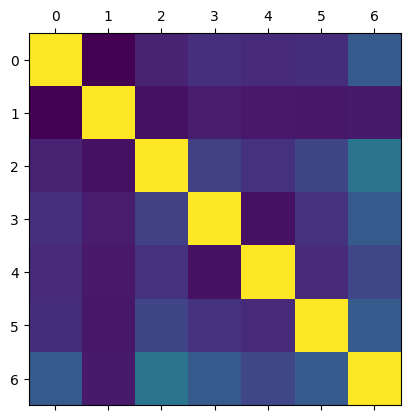

In [13]:
plt.matshow(df_train.corr())

In [21]:
def get_accuracy(my_model, input: pd.DataFrame, ans: pd.Series):
    return 100.*sum(np.round(my_model.predict(input)).astype(int, copy=False)[:,0] == ans)/len(ans)

In [22]:
get_accuracy(model, x, y)

782/782 [==============================] - 2s 2ms/step


97.116